## 12.基于LSTM神经网络模型的电影评论文本情感分类

In [1]:
import re
from bs4 import BeautifulSoup
import pandas as pd
import csv
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#读取训练集
train_csv=pd.read_csv('D:\WorkPath\case\基于LSTM神经网络模型的电影评论文本情感分类\data\data_train.csv')
train_csv

,影评内容,真实标签
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
...,...,...
24995,"Towards the end of the movie, I felt it was to...",0
24996,This is the kind of movie that my enemies cont...,0
24997,I saw 'Descent' last night at the Stockholm Fi...,0
24998,Some films that you pick up for a pound turn o...,0


In [3]:
#读取测试集
test_csv=pd.read_csv('D:\WorkPath\case\基于LSTM神经网络模型的电影评论文本情感分类\data\data_test.csv')
test_csv

,影评内容,真实标签
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
...,...,...
24995,I occasionally let my kids watch this garbage ...,0
24996,When all we have anymore is pretty much realit...,0
24997,The basic genre is a thriller intercut with an...,0
24998,Four things intrigued me as to this film - fir...,0


In [4]:
#整理文字，方便后续分析
def review_to_wordlist(review):

    review_text = BeautifulSoup(review, "html.parser").get_text()
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    words = review_text.lower().split()
    return words

In [5]:
#整理训练集
train_label = train_csv['真实标签']
y_train=train_label.values
train_texts = []
for i in range(len(train_csv['影评内容'])):
    train_texts.append(' '.join(review_to_wordlist(train_csv['影评内容'][i])))
print('影评内容：')
print(train_texts[3])
print('真实标签：')
print(y_train)


影评内容：
this is easily the most underrated film inn the brooks cannon sure its flawed it does not give a realistic view of homelessness unlike say how citizen kane gave a realistic view of lounge singers or titanic gave a realistic view of italians you idiots many of the jokes fall flat but still this film is very lovable in a way many comedies are not and to pull that off in a story about some of the most traditionally reviled members of society is truly impressive its not the fisher king but its not crap either my only complaint is that brooks should have cast someone else in the lead i love mel as a director and writer not so much as a lead
真实标签：
[1 1 1 ... 0 0 0]


## 展示文字处理后的测试数据

In [6]:
#整理测试集
test_label=test_csv['真实标签']#读取测试集表格中的真实标签列
y_test=test_label.values#将标签列从series结构转换成ndarray格式
test_texts = []#读取测试集表格中的影评内容列，以列表形式显示
for i in range(len(test_csv['影评内容'])):
    test_texts.append(' '.join(review_to_wordlist(test_csv['影评内容'][i])))
#调用review_to_wordlist函数进行影平内容规范化处理
#展示数据
print('影评内容：')
print(test_texts[3])
print('真实标签：')
print(y_test)


影评内容：
i saw this film in a sneak preview and it is delightful the cinematography is unusually creative the acting is good and the story is fabulous if this movie does not do well it won t be because it doesn t deserve to before this film i didn t realize how charming shia lebouf could be he does a marvelous self contained job as the lead there s something incredibly sweet about him and it makes the movie even better the other actors do a good job as well and the film contains moments of really high suspense more than one might expect from a movie about golf sports movies are a dime a dozen but this one stands out this is one i d recommend to anyone
真实标签：
[1 1 1 ... 0 0 0]


In [10]:
#找出现频率最高的4000个词
token=tf.keras.preprocessing.text.Tokenizer(num_words=4000)
token.fit_on_texts(train_texts)
word_index = token.word_index

In [11]:
#根据上面生成的字典word_index将每个影评的每个单词映射为一个数字
train_sequences=token.texts_to_sequences(train_texts)#得到训练集文本文字对应的数字列表
test_sequences=token.texts_to_sequences(test_texts)#得到测试集文本文字对应的数字列表

In [12]:
#显示转换前的文字
print(train_texts[3])

this is easily the most underrated film inn the brooks cannon sure its flawed it does not give a realistic view of homelessness unlike say how citizen kane gave a realistic view of lounge singers or titanic gave a realistic view of italians you idiots many of the jokes fall flat but still this film is very lovable in a way many comedies are not and to pull that off in a story about some of the most traditionally reviled members of society is truly impressive its not the fisher king but its not crap either my only complaint is that brooks should have cast someone else in the lead i love mel as a director and writer not so much as a lead


In [13]:
#显示转换后的数字列表
print(train_sequences[3])

[10, 6, 692, 1, 89, 2161, 19, 1, 2815, 248, 91, 3001, 7, 125, 23, 199, 3, 804, 633, 4, 1000, 132, 86, 3530, 3339, 509, 3, 804, 633, 4, 41, 2549, 509, 3, 804, 633, 4, 21, 3707, 108, 4, 1, 622, 788, 1011, 18, 130, 10, 19, 6, 54, 3174, 8, 3, 93, 108, 1259, 25, 23, 2, 5, 1572, 11, 122, 8, 3, 62, 43, 48, 4, 1, 89, 1039, 4, 878, 6, 364, 1133, 91, 23, 1, 3443, 601, 18, 91, 23, 580, 341, 59, 63, 3264, 6, 11, 2815, 142, 27, 176, 278, 325, 8, 1, 475, 9, 114, 3685, 14, 3, 156, 2, 532, 23, 36, 73, 14, 3, 475]


In [14]:
#将每条影评都变为400个数字，不足400的部分补0超出400的部分删除
x_train=tf.keras.preprocessing.sequence.pad_sequences(train_sequences,padding='post',truncating='post',maxlen=400)
x_test=tf.keras.preprocessing.sequence.pad_sequences(test_sequences,padding='post',truncating='post',maxlen=400)

### 查看训练集中经过转化后的影评内容和标签

In [40]:
#查看预处理后的2D张量
print(x_train)
print(y_train)

[[307   6   3 ...   0   0   0]
 [ 41  14 707 ...   0   0   0]
 [518 118 112 ...   0   0   0]
 ...
 [  9 216 231 ...   0   0   0]
 [ 48 106  11 ...   0   0   0]
 [ 10   6  29 ...   0   0   0]]
[1 1 1 ... 0 0 0]


In [15]:
#打乱顺序生成训练集
index = np.arange(25000) 
np.random.shuffle(index)
print(x_train[index]) 
print(y_train[index])

[[ 499    1   17 ...    0    0    0]
 [1427  244    6 ...    0    0    0]
 [   9   27  107 ...    0    0    0]
 ...
 [   9  140  245 ...    0    0    0]
 [  10   17  505 ...    0    0    0]
 [   9  234   42 ...    0    0    0]]
[1 1 0 ... 1 0 0]


### 用layer来搭建顺序模型

In [16]:
model=tf.keras.models.Sequential([
    #嵌入层，将已经数据化的影评数据转化为向量
    #向量化母的，实现将单词嵌入多维矩阵，使得语义相同的单词，再空降距离上更接近
    tf.keras.layers.Embedding(output_dim=64,input_dim=4000,input_length=400),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),#RNN的双向封装器，用于对序列进行前向和后向继算
    tf.keras.layers.Dense(64, activation='relu'),#隐藏层，64个神经元，激活函数为relu的函数
    #Dropout层以指定的丢弃概率随机丢弃上一层的神经元
    tf.keras.layers.Dropout(0.2),#防止过拟合，随机选择丢掉20%的神经元
    tf.keras.layers.Dense(1,activation='sigmoid')#输出层
])



### 使用compile配置训练算法

In [18]:
adam = tf.keras.optimizers.Adam(lr=0.0001,epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam,#指定优化器 adam
              loss='binary_crossentropy',）#指定损失函数
              metrics=['accuracy'])#设置模型检验的方法

In [19]:
#记录训练过程
history = model.fit(x_train[index],y_train[index],
                    validation_split=0.3,
                     epochs=10,batch_size=56,verbose=1,shuffle=True)


Epoch 1/10
313/313 [==============================] - 140s 447ms/step - loss: 0.6880 - accuracy: 0.5467 - val_loss: 0.6264 - val_accuracy: 0.6973
Epoch 2/10
313/313 [==============================] - 135s 430ms/step - loss: 0.4420 - accuracy: 0.8086 - val_loss: 0.3412 - val_accuracy: 0.8587
Epoch 3/10
313/313 [==============================] - 140s 448ms/step - loss: 0.2948 - accuracy: 0.8843 - val_loss: 0.3111 - val_accuracy: 0.8745
Epoch 4/10
313/313 [==============================] - 140s 448ms/step - loss: 0.2518 - accuracy: 0.9033 - val_loss: 0.2996 - val_accuracy: 0.8795
Epoch 5/10
313/313 [==============================] - 140s 447ms/step - loss: 0.2247 - accuracy: 0.9148 - val_loss: 0.3074 - val_accuracy: 0.8775
Epoch 6/10
313/313 [==============================] - 138s 440ms/step - loss: 0.2027 - accuracy: 0.9259 - val_loss: 0.3355 - val_accuracy: 0.8707
Epoch 7/10
313/313 [==============================] - 139s 445ms/step - loss: 0.1934 - accuracy: 0.9314 - val_loss: 0.3090 -

In [20]:
#保存权重
model.save_weights('./imdb-classify-lstm/finalmodel')

In [21]:
#读取权重
model.load_weights('./imdb-classify-lstm/finalmodel')

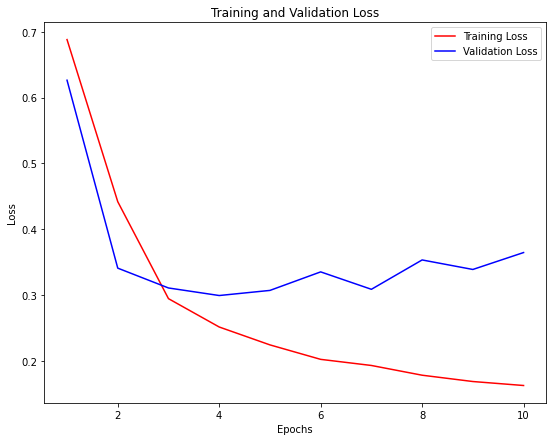

In [23]:
#画迭代次数对应损失值的图
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1,len(train_acc)+1)
plt.figure(figsize=(9,7))
plt.plot(epochs,train_loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

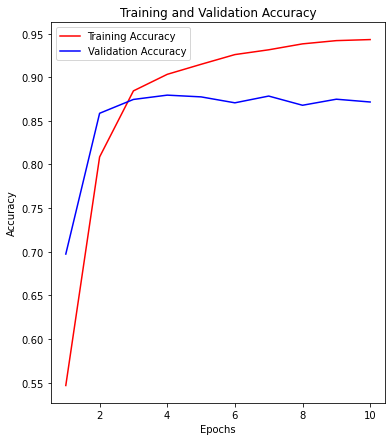

In [24]:
#画迭代次数对应准确率的图
plt.clf()  
plt.figure(figsize=(6,7))
plt.plot(epochs,train_acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
#模型最终损失值和准确率
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=1)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 80s 102ms/step - loss: 0.3768 - accuracy: 0.8632
Test Loss: 0.37675294280052185
Test Accuracy: 0.8631600141525269


In [26]:
predictions=model.predict(x_test)
predictions[0]

array([0.9851166], dtype=float32)

In [43]:
#建新表，输入整理后的影评内容，真实标签和预测值
with open('data\\result_prediction.csv', 'w',encoding='utf-8-sig',newline='') as csvfile:
    fieldnames = ['影评内容', '真实标签','预测标签']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in range(len(test_texts)):
        writer.writerow({'影评内容': test_texts[i], '真实标签': y_test[i],'预测标签': predictions[i][0]})
  

In [44]:
df=pd.read_csv('D:\\WorkPath\\case\\\基于LSTM神经网络模型的电影评论文本情感分类\\data\\result_prediction.csv')
df

,影评内容,真实标签,预测标签
0,i went and saw this movie last night after bei...,1,0.985117
1,actor turned director bill paxton follows up h...,1,0.990661
2,as a recreational golfer with some knowledge o...,1,0.983745
3,i saw this film in a sneak preview and it is d...,1,0.994496
4,bill paxton has taken the true story of the us...,1,0.998841
...,...,...,...
24995,i occasionally let my kids watch this garbage ...,0,0.044626
24996,when all we have anymore is pretty much realit...,0,0.132080
24997,the basic genre is a thriller intercut with an...,0,0.372531
24998,four things intrigued me as to this film first...,0,0.052923


In [45]:
def display_test_sentiment(text):#情感分类函数
    
    print(text)
    newtext=review_to_wordlist(text)#将文本内容分割为单词
    input_seq=token.texts_to_sequences([newtext])#保存高频单词的索引值
    pad_input_seq=tf.keras.preprocessing.sequence.pad_sequences(input_seq,
                                                   padding='post',
                                                   truncating='post',
                                                   maxlen=400)
    pred=model.predict(pad_input_seq)#预测，四舍五入，舍为消极，入为积极
    print(pred[0][0])
    if pred[0][0]>0.5:
        preValue='positive'
    else:
        preValue='negtive'
    print('predict value:',preValue)

In [46]:
#例一
review_text="There is no better way to give tribute to a genuinely amazing actor. The film was pretty emotional and touching. Such natural acting from #Sushanth and #SanjanaSanghi and a brilliant execution from other the cast and crew. The movie indeed had plot holes and rushed up situations but I don't think anyone will notice those stuffs as the movie maintained a emotionally touching storyline and knowing the fact that Sushanth left us made it way more emotional and can't finish the movie without releasing a single drop of tear."
display_test_sentiment(review_text)

There is no better way to give tribute to a genuinely amazing actor. The film was pretty emotional and touching. Such natural acting from #Sushanth and #SanjanaSanghi and a brilliant execution from other the cast and crew. The movie indeed had plot holes and rushed up situations but I don't think anyone will notice those stuffs as the movie maintained a emotionally touching storyline and knowing the fact that Sushanth left us made it way more emotional and can't finish the movie without releasing a single drop of tear.
0.9926698
predict value: positive


In [47]:
#例二
review_text="This movie has potential but everything goes to heck because of the extremely bad script. First, you need to wait almost 60 minutes of 90 to see something interesting. Second, when the action starts everything goes extremely fast. Shia's character was barely developed. Are you serious? Last, Fx's look cheap and acting amateurish, except from Shia. But...So, overall a wasted opportunity to create a great movie. Shame on Director 's and writers. Make yourself a favor and watch Sicario 1 and 2 instead watching this one."
display_test_sentiment(review_text)

This movie has potential but everything goes to heck because of the extremely bad script. First, you need to wait almost 60 minutes of 90 to see something interesting. Second, when the action starts everything goes extremely fast. Shia's character was barely developed. Are you serious? Last, Fx's look cheap and acting amateurish, except from Shia. But...So, overall a wasted opportunity to create a great movie. Shame on Director 's and writers. Make yourself a favor and watch Sicario 1 and 2 instead watching this one.
0.0038419068
predict value: negtive
